In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Try with **multiple dimension**! 5 or 6

In [6]:
import warnings
warnings.filterwarnings("ignore")

from utils_artificial import gaussian_error_data
import pandas as pd

In [7]:
from pathlib import Path
outfig_dir = "0_output_figures"
Path(outfig_dir).mkdir(parents=True, exist_ok=True)

# Error rate based on a gaussian

# Tree divergence results

In [14]:
min_sups = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

In [15]:
overall_stats = {}

In [16]:

for n_attributes in [3]:
    if n_attributes in overall_stats:
        stats_tree = overall_stats[n_attributes]
    else:
        stats_tree = {}
    
    print(n_attributes)
    

    df_analysis, attributes, g, g_sc = gaussian_error_data(n = 10000, n_attributes = n_attributes)

    from tqdm import tqdm 

    from utils_extract_divergence_generalized_ranking import (
        extract_divergence_generalized,
    )



    pred_name ="predicted_class"
    class_name =  "true_class" 
    class_map = {"P":1, "N":0}

    continuous_attributes = attributes

    min_sup_divergence=0.025

    type_experiment = "one_at_time"
    metric = "d_error"
    type_criterion = "weighted_sum_abs_reference_s"


    from tree_discretization import TreeDiscretization

    tree_discr = TreeDiscretization()


    for min_support in min_sups:
        if min_support in stats_tree:
            continue
        print(min_support, end = " ")
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analysis,
            type_splitting=type_experiment,
            min_support=min_support,
            metric=metric,
            continuous_attributes= list(continuous_attributes),
            storeTree=True,
            type_criterion = type_criterion,
            minimal_gain = 0.00,    
            class_map=class_map,
            class_and_pred_names=[class_name, pred_name],
        )    

        for apply_generalization in [True, False]:
            if apply_generalization is True:
                gen_type = "generalized"
            else:
                gen_type = "base"
            FP_fm = extract_divergence_generalized(
                df_analysis,
                discretizations,
                generalization_dict,
                continuous_attributes,
                min_sup_divergence=min_sup_divergence,
                apply_generalization=apply_generalization,
                true_class_name=pred_name,
                predicted_class_name=class_name,
                class_map=class_map,
                FPM_type="fpgrowth",
                metrics_divergence = [metric],
                type_experiment = type_experiment,
                allow_overalp = False if type_experiment!="all_attributes" else True
            )
            from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
            fp_divergence_o=FP_Divergence(FP_fm, metric)
            fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)

            if min_support not in stats_tree:
                stats_tree[min_support] = {}
            stats_tree[min_support][gen_type] = fpdiv.iloc[0]
            
    overall_stats[n_attributes] = stats_tree

3
0.005 

,a,b,c,predicted_class,true_class
0,[-1.38596--1.23537],>=3.57506,[2.28892-2.3644],1.0,1.0
1,[0.90754-0.98842],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.06168],1.0,1.0
3,[1.85854-2.35663],<=-1.77667,[4.46264-4.95516],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.07324-1.12088],[1.23308-1.31991],<=-0.41083,1.0,1.0
9996,[-0.3499--0.29184],<=-1.77667,[-0.35216--0.22386],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.37076--1.99379],>=3.57506,[2.42496-2.49315],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.38596--1.23537],>=3.57506,[2.28892-2.3644],1.0,1.0
1,[0.90754-0.98842],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.06168],1.0,1.0
3,[1.85854-2.35663],<=-1.77667,[4.46264-4.95516],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.07324-1.12088],[1.23308-1.31991],<=-0.41083,1.0,1.0
9996,[-0.3499--0.29184],<=-1.77667,[-0.35216--0.22386],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.37076--1.99379],>=3.57506,[2.42496-2.49315],0.0,0.0


0.01 

,a,b,c,predicted_class,true_class
0,[-1.38596--1.23537],>=3.57506,[2.28892-2.42458],1.0,1.0
1,[0.90754-1.02154],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.10394],1.0,1.0
3,[1.85854-2.30588],<=-1.77667,[4.46264-4.89723],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.02367-1.12088],[1.23308-1.37844],<=-0.41083,1.0,1.0
9996,[-0.40876--0.29184],<=-1.77667,[-0.4076--0.22386],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.30838--1.99379],>=3.57506,[2.42496-2.61675],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.38596--1.23537],>=3.57506,[2.28892-2.42458],1.0,1.0
1,[0.90754-1.02154],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.10394],1.0,1.0
3,[1.85854-2.30588],<=-1.77667,[4.46264-4.89723],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.02367-1.12088],[1.23308-1.37844],<=-0.41083,1.0,1.0
9996,[-0.40876--0.29184],<=-1.77667,[-0.4076--0.22386],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.30838--1.99379],>=3.57506,[2.42496-2.61675],0.0,0.0


0.02 

,a,b,c,predicted_class,true_class
0,[-1.54658--1.23537],>=3.57506,[2.28892-2.59119],1.0,1.0
1,[0.80756-1.07309],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.30093],1.0,1.0
3,[1.85854-2.19838],<=-1.77667,[4.46264-4.80005],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.07324-1.31308],[1.10387-1.33828],<=-0.41083,1.0,1.0
9996,[-0.5065--0.31822],<=-1.77667,[-0.4076--0.19865],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--2.20021],>=3.57506,[2.28892-2.59119],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.54658--1.23537],>=3.57506,[2.28892-2.59119],1.0,1.0
1,[0.80756-1.07309],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.30093],1.0,1.0
3,[1.85854-2.19838],<=-1.77667,[4.46264-4.80005],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.07324-1.31308],[1.10387-1.33828],<=-0.41083,1.0,1.0
9996,[-0.5065--0.31822],<=-1.77667,[-0.4076--0.19865],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--2.20021],>=3.57506,[2.28892-2.59119],0.0,0.0


0.025 

,a,b,c,predicted_class,true_class
0,[-1.54658--1.23537],>=3.57506,[2.28892-2.59119],1.0,1.0
1,[0.80756-1.0672],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.30093],1.0,1.0
3,[1.85854-2.15972],<=-1.77667,[4.46264-4.75602],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.06831-1.31308],[1.10387-1.54763],<=-0.41083,1.0,1.0
9996,[-0.5065--0.1441],<=-1.77667,[-0.4076-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--2.14905],>=3.57506,[2.28892-2.59119],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.54658--1.23537],>=3.57506,[2.28892-2.59119],1.0,1.0
1,[0.80756-1.0672],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.30093],1.0,1.0
3,[1.85854-2.15972],<=-1.77667,[4.46264-4.75602],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.06831-1.31308],[1.10387-1.54763],<=-0.41083,1.0,1.0
9996,[-0.5065--0.1441],<=-1.77667,[-0.4076-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--2.14905],>=3.57506,[2.28892-2.59119],0.0,0.0


0.035 

,a,b,c,predicted_class,true_class
0,[-1.82024--1.23537],>=3.57506,[2.28892-2.94135],1.0,1.0
1,[0.84039-1.31308],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[0.96852-1.30093],1.0,1.0
3,[1.85854-2.40809],<=-1.77667,>=4.46264,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[0.84039-1.31308],[1.10387-1.54763],<=-0.41083,1.0,1.0
9996,[-0.5065-0.10581],<=-1.77667,[-0.4076-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--1.82215],>=3.57506,[2.28892-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.82024--1.23537],>=3.57506,[2.28892-2.94135],1.0,1.0
1,[0.84039-1.31308],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[0.96852-1.30093],1.0,1.0
3,[1.85854-2.40809],<=-1.77667,>=4.46264,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[0.84039-1.31308],[1.10387-1.54763],<=-0.41083,1.0,1.0
9996,[-0.5065-0.10581],<=-1.77667,[-0.4076-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--1.82215],>=3.57506,[2.28892-2.94135],0.0,0.0


0.05 

,a,b,c,predicted_class,true_class
0,[-1.82024--1.23537],>=3.57506,[2.28892-2.94135],1.0,1.0
1,[0.51404-1.31308],<=-1.77667,<=-0.46965,0.0,0.0
2,<=-2.42196,>=3.57506,[0.7591-1.30093],1.0,1.0
3,[1.85854-2.40809],<=-1.77667,>=4.46264,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.46965,1.0,1.0
...,...,...,...,...,...
9995,[0.51404-1.31308],[0.55364-1.54763],<=-0.46965,1.0,1.0
9996,[-0.5065-0.00359],<=-1.77667,[-0.46866-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.46965,0.0,0.0
9998,[-2.42136--1.82215],>=3.57506,[2.28892-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-1.82024--1.23537],>=3.57506,[2.28892-2.94135],1.0,1.0
1,[0.51404-1.31308],<=-1.77667,<=-0.46965,0.0,0.0
2,<=-2.42196,>=3.57506,[0.7591-1.30093],1.0,1.0
3,[1.85854-2.40809],<=-1.77667,>=4.46264,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.46965,1.0,1.0
...,...,...,...,...,...
9995,[0.51404-1.31308],[0.55364-1.54763],<=-0.46965,1.0,1.0
9996,[-0.5065-0.00359],<=-1.77667,[-0.46866-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.46965,0.0,0.0
9998,[-2.42136--1.82215],>=3.57506,[2.28892-2.94135],0.0,0.0


0.075 

,a,b,c,predicted_class,true_class
0,[-2.42136--1.23537],>=3.57506,[2.1846-2.94135],1.0,1.0
1,[0.51404-1.31308],<=-1.77667,<=-0.71542,0.0,0.0
2,<=-2.42196,>=3.57506,[0.03966-1.30093],1.0,1.0
3,[1.31419-2.40809],<=-1.77667,>=3.76292,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.71542,1.0,1.0
...,...,...,...,...,...
9995,[0.51404-1.31308],[0.55364-1.54763],<=-0.71542,1.0,1.0
9996,[-0.5065-0.51331],<=-1.77667,[-0.71527-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.71542,0.0,0.0
9998,[-2.42136--1.23537],>=3.57506,[2.1846-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-2.42136--1.23537],>=3.57506,[2.1846-2.94135],1.0,1.0
1,[0.51404-1.31308],<=-1.77667,<=-0.71542,0.0,0.0
2,<=-2.42196,>=3.57506,[0.03966-1.30093],1.0,1.0
3,[1.31419-2.40809],<=-1.77667,>=3.76292,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.71542,1.0,1.0
...,...,...,...,...,...
9995,[0.51404-1.31308],[0.55364-1.54763],<=-0.71542,1.0,1.0
9996,[-0.5065-0.51331],<=-1.77667,[-0.71527-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.71542,0.0,0.0
9998,[-2.42136--1.23537],>=3.57506,[2.1846-2.94135],0.0,0.0


0.1 

,a,b,c,predicted_class,true_class
0,[-2.42136--1.23537],>=3.57506,[1.30186-2.94135],1.0,1.0
1,[0.19612-1.31308],<=-1.77667,<=-0.94874,0.0,0.0
2,<=-2.42196,>=3.57506,[0.03966-1.30093],1.0,1.0
3,[1.31419-2.40809],<=-1.77667,>=3.97831,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.94874,1.0,1.0
...,...,...,...,...,...
9995,[0.19612-1.31308],[0.55364-2.46567],<=-0.94874,1.0,1.0
9996,[-1.2344-0.19607],<=-1.77667,[-0.94675-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.94874,0.0,0.0
9998,[-2.42136--1.23537],>=3.57506,[1.30186-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-2.42136--1.23537],>=3.57506,[1.30186-2.94135],1.0,1.0
1,[0.19612-1.31308],<=-1.77667,<=-0.94874,0.0,0.0
2,<=-2.42196,>=3.57506,[0.03966-1.30093],1.0,1.0
3,[1.31419-2.40809],<=-1.77667,>=3.97831,0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.94874,1.0,1.0
...,...,...,...,...,...
9995,[0.19612-1.31308],[0.55364-2.46567],<=-0.94874,1.0,1.0
9996,[-1.2344-0.19607],<=-1.77667,[-0.94675-0.03959],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.94874,0.0,0.0
9998,[-2.42136--1.23537],>=3.57506,[1.30186-2.94135],0.0,0.0


0.125 

,a,b,c,predicted_class,true_class
0,[-2.50331--1.23537],>=3.75187,[1.30186-2.94135],1.0,1.0
1,[0.08578-1.31308],<=-2.01299,<=-1.18426,0.0,0.0
2,<=-2.50332,[2.46665-3.75059],[0.03966-1.30093],1.0,1.0
3,[1.31419-2.56594],<=-2.01299,>=2.94163,0.0,0.0
4,>=2.56602,<=-2.01299,<=-1.18426,1.0,1.0
...,...,...,...,...,...
9995,[0.08578-1.31308],[0.55364-2.46567],<=-1.18426,1.0,1.0
9996,[-1.2344-0.08519],<=-2.01299,[-1.18068-0.03959],1.0,1.0
9997,>=2.56602,<=-2.01299,<=-1.18426,0.0,0.0
9998,[-2.50331--1.23537],>=3.75187,[1.30186-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-2.50331--1.23537],>=3.75187,[1.30186-2.94135],1.0,1.0
1,[0.08578-1.31308],<=-2.01299,<=-1.18426,0.0,0.0
2,<=-2.50332,[2.46665-3.75059],[0.03966-1.30093],1.0,1.0
3,[1.31419-2.56594],<=-2.01299,>=2.94163,0.0,0.0
4,>=2.56602,<=-2.01299,<=-1.18426,1.0,1.0
...,...,...,...,...,...
9995,[0.08578-1.31308],[0.55364-2.46567],<=-1.18426,1.0,1.0
9996,[-1.2344-0.08519],<=-2.01299,[-1.18068-0.03959],1.0,1.0
9997,>=2.56602,<=-2.01299,<=-1.18426,0.0,0.0
9998,[-2.50331--1.23537],>=3.75187,[1.30186-2.94135],0.0,0.0


0.15 

,a,b,c,predicted_class,true_class
0,[-2.74179--1.23537],>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.25952,<=-1.44327,0.0,0.0
2,<=-2.7442,>=2.46665,[0.03966-2.94135],1.0,1.0
3,[1.31419-2.80338],<=-2.25952,>=2.94163,0.0,0.0
4,>=2.80366,<=-2.25952,<=-1.44327,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[0.76406-2.46567],<=-1.44327,1.0,1.0
9996,[-1.2344-1.31308],<=-2.25952,[-1.44313-0.03959],1.0,1.0
9997,[1.31419-2.80338],<=-2.25952,<=-1.44327,0.0,0.0
9998,[-2.74179--1.23537],>=2.46665,[0.03966-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-2.74179--1.23537],>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.25952,<=-1.44327,0.0,0.0
2,<=-2.7442,>=2.46665,[0.03966-2.94135],1.0,1.0
3,[1.31419-2.80338],<=-2.25952,>=2.94163,0.0,0.0
4,>=2.80366,<=-2.25952,<=-1.44327,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[0.76406-2.46567],<=-1.44327,1.0,1.0
9996,[-1.2344-1.31308],<=-2.25952,[-1.44313-0.03959],1.0,1.0
9997,[1.31419-2.80338],<=-2.25952,<=-1.44327,0.0,0.0
9998,[-2.74179--1.23537],>=2.46665,[0.03966-2.94135],0.0,0.0


0.175 

,a,b,c,predicted_class,true_class
0,[-2.99989--1.23537],>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.5235,<=-1.68028,0.0,0.0
2,<=-2.99991,>=2.46665,[0.03966-2.94135],1.0,1.0
3,[1.31419-3.0567],<=-2.5235,>=2.94163,0.0,0.0
4,>=3.05715,<=-2.5235,<=-1.68028,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[-0.77808-2.46567],<=-1.68028,1.0,1.0
9996,[-1.2344-1.31308],[-2.52124--0.77995],[-1.68017-0.03959],1.0,1.0
9997,[1.31419-3.0567],<=-2.5235,<=-1.68028,0.0,0.0
9998,[-2.99989--1.23537],>=2.46665,[0.03966-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,[-2.99989--1.23537],>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.5235,<=-1.68028,0.0,0.0
2,<=-2.99991,>=2.46665,[0.03966-2.94135],1.0,1.0
3,[1.31419-3.0567],<=-2.5235,>=2.94163,0.0,0.0
4,>=3.05715,<=-2.5235,<=-1.68028,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[-0.77808-2.46567],<=-1.68028,1.0,1.0
9996,[-1.2344-1.31308],[-2.52124--0.77995],[-1.68017-0.03959],1.0,1.0
9997,[1.31419-3.0567],<=-2.5235,<=-1.68028,0.0,0.0
9998,[-2.99989--1.23537],>=2.46665,[0.03966-2.94135],0.0,0.0


0.2 

,a,b,c,predicted_class,true_class
0,<=-1.23537,>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.7525,<=-1.94905,0.0,0.0
2,<=-1.23537,>=2.46665,[0.03966-2.94135],1.0,1.0
3,>=1.31419,<=-2.7525,>=2.94163,0.0,0.0
4,>=1.31419,<=-2.7525,<=-1.94905,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[-0.77808-2.46567],<=-1.94905,1.0,1.0
9996,[-1.2344-1.31308],[-2.7524--0.77995],[-1.949-0.03959],1.0,1.0
9997,>=1.31419,<=-2.7525,<=-1.94905,0.0,0.0
9998,<=-1.23537,>=2.46665,[0.03966-2.94135],0.0,0.0


,a,b,c,predicted_class,true_class
0,<=-1.23537,>=2.46665,[0.03966-2.94135],1.0,1.0
1,[-1.2344-1.31308],<=-2.7525,<=-1.94905,0.0,0.0
2,<=-1.23537,>=2.46665,[0.03966-2.94135],1.0,1.0
3,>=1.31419,<=-2.7525,>=2.94163,0.0,0.0
4,>=1.31419,<=-2.7525,<=-1.94905,1.0,1.0
...,...,...,...,...,...
9995,[-1.2344-1.31308],[-0.77808-2.46567],<=-1.94905,1.0,1.0
9996,[-1.2344-1.31308],[-2.7524--0.77995],[-1.949-0.03959],1.0,1.0
9997,>=1.31419,<=-2.7525,<=-1.94905,0.0,0.0
9998,<=-1.23537,>=2.46665,[0.03966-2.94135],0.0,0.0


In [50]:

for n_attributes in [3]:
    if n_attributes in overall_stats:
        stats_tree = overall_stats[n_attributes]
    else:
        stats_tree = {}
    
    print(n_attributes)
    

    df_analysis, attributes, g, g_sc = gaussian_error_data(n = 10000, n_attributes = n_attributes)

    from tqdm import tqdm 

    from utils_extract_divergence_generalized_ranking import (
        extract_divergence_generalized,
    )



    pred_name ="predicted_class"
    class_name =  "true_class" 
    class_map = {"P":1, "N":0}

    continuous_attributes = attributes

    min_sup_divergence=0.025

    type_experiment = "one_at_time"
    metric = "d_error"
    type_criterion = "weighted_sum_abs_reference_s"


    from tree_discretization import TreeDiscretization

    tree_discr = TreeDiscretization()


    min_support = 0.02

    generalization_dict, discretizations = tree_discr.get_tree_discretization(
        df_analysis,
        type_splitting=type_experiment,
        min_support=min_support,
        metric=metric,
        continuous_attributes= list(continuous_attributes),
        storeTree=True,
        type_criterion = type_criterion,
        minimal_gain = 0.00,    
        class_map=class_map,
        class_and_pred_names=[class_name, pred_name],
    )    

    apply_generalization  = False
    FP_fm = extract_divergence_generalized(
        df_analysis,
        discretizations,
        generalization_dict,
        continuous_attributes,
        min_sup_divergence=min_sup_divergence,
        apply_generalization=apply_generalization,
        true_class_name=pred_name,
        predicted_class_name=class_name,
        class_map=class_map,
        FPM_type="fpgrowth",
        metrics_divergence = [metric],
        type_experiment = type_experiment,
        allow_overalp = False if type_experiment!="all_attributes" else True
    )
    from divexplorer_generalized_ranking.FP_Divergence import FP_Divergence
    fp_divergence_o=FP_Divergence(FP_fm, metric)
    fpdiv = fp_divergence_o.getDivergence(th_redundancy=0).sort_values(fp_divergence_o.metric, ascending = False)


3


,a,b,c,predicted_class,true_class
0,[-1.54658--1.23537],>=3.57506,[2.28892-2.59119],1.0,1.0
1,[0.80756-1.07309],<=-1.77667,<=-0.41083,0.0,0.0
2,<=-2.42196,>=3.57506,[1.00583-1.30093],1.0,1.0
3,[1.85854-2.19838],<=-1.77667,[4.46264-4.80005],0.0,0.0
4,>=2.40818,<=-1.77667,<=-0.41083,1.0,1.0
...,...,...,...,...,...
9995,[1.07324-1.31308],[1.10387-1.33828],<=-0.41083,1.0,1.0
9996,[-0.5065--0.31822],<=-1.77667,[-0.4076--0.19865],1.0,1.0
9997,>=2.40818,<=-1.77667,<=-0.41083,0.0,0.0
9998,[-2.42136--2.20021],>=3.57506,[2.28892-2.59119],0.0,0.0


In [51]:
FP_fm

,support,itemsets,tn,fp,fn,tp,length,support_count,error,d_error,t_value_fp_fn
0,1.0000,(),4917,75,83,4925,0,10000.0,0.015800,0.000000,0.000000
1,0.4617,(c=<=-0.41083),2330,0,0,2287,1,4617.0,0.000000,-0.015800,12.354785
2,0.3212,(b=<=-1.77667),1614,0,0,1598,1,3212.0,0.000000,-0.015800,12.094325
3,0.2604,(a=>=2.40818),1298,0,0,1306,1,2604.0,0.000000,-0.015800,11.859421
4,0.2540,(a=<=-2.42196),1280,0,0,1260,1,2540.0,0.000000,-0.015800,11.826148
5,0.1496,"(c=<=-0.41083, b=<=-1.77667)",765,0,0,731,2,1496.0,0.000000,-0.015800,10.744623
6,0.1453,(b=>=3.57506),724,0,0,729,1,1453.0,0.000000,-0.015800,10.660166
7,0.1195,"(a=>=2.40818, c=<=-0.41083)",590,0,0,605,2,1195.0,0.000000,-0.015800,10.017128
8,0.1174,"(c=<=-0.41083, a=<=-2.42196)",600,0,0,574,2,1174.0,0.000000,-0.015800,9.952143
9,0.0875,"(a=>=2.40818, b=<=-1.77667)",432,0,0,443,2,875.0,0.000000,-0.015800,8.723985


In [52]:
from utils_discretize_df import (
    discretize_df_via_discretizations,
)

df_discreted_d = discretize_df_via_discretizations(
    df_analysis,
    discretizations,
    allow_overalp = False
)

In [53]:
{k:v/len(df_discreted_d) for k, v in dict(df_discreted_d["a"].value_counts()).items()}

{'>=2.40818': 0.2604,
 '<=-2.42196': 0.254,
 '[0.10747-0.51331]': 0.0399,
 '[-2.1988--1.82215]': 0.0381,
 '[1.85854-2.19838]': 0.0343,
 '[1.31419-1.66538]': 0.0335,
 '[0.51404-0.80749]': 0.0315,
 '[-1.54658--1.23537]': 0.03,
 '[-1.82024--1.54793]': 0.0283,
 '[0.80756-1.07309]': 0.0274,
 '[-0.78163--0.50824]': 0.0264,
 '[-1.2344--0.99855]': 0.0252,
 '[1.07324-1.31308]': 0.0244,
 '[-0.9985--0.78219]': 0.0234,
 '[-0.31711--0.08405]': 0.0228,
 '[1.66686-1.85815]': 0.0204,
 '[2.1994-2.40809]': 0.02,
 '[-0.08262-0.10581]': 0.02,
 '[-0.5065--0.31822]': 0.02,
 '[-2.42136--2.20021]': 0.02}

In [21]:
import pandas as pd

for n_attributes in overall_stats:
    print(n_attributes)
    vs = {}
    stats_tree = overall_stats[n_attributes]
    for min_support in stats_tree:
        vs[min_support] = {type_gen: stats_tree[min_support][type_gen]["d_error"] for type_gen in stats_tree[min_support]}
    df_res = pd.DataFrame(vs)
    display(df_res)

3


,0.005,0.010,0.020,0.025,0.035,0.050,0.075,0.100,0.125,0.150,0.175,0.200
generalized,0.325109,0.325109,0.325109,0.325109,0.325109,0.325109,0.325109,0.325109,0.325109,0.267219,0.267219,0.267219
base,0.000000,0.000000,0.080586,0.091892,0.077096,0.068978,0.064044,0.177652,0.177652,0.157196,0.131653,0.131653


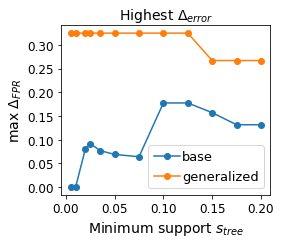

In [38]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

n_attributes = 3
vs = {}
stats_tree = overall_stats[n_attributes]

fig, ax = plt.subplots(figsize = (4,3.5))

base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

base = dict(sorted(base.items(), key=lambda item: item[0]))
gen = dict(sorted(gen.items(), key=lambda item: item[0]))


ax.plot(list(base.keys()), list(base.values()), label = "base", marker = "o")
ax.plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o")
ax.set_title(r"Highest Δ$_{error}$")
ax.set_ylabel(r"max Δ$_{FPR}$")
ax.set_xlabel(r"Minimum support $s_{tree}$")
plt.legend( fontsize = 13, handletextpad=0.2)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): #ax.get_xticklabels()
    item.set_fontsize(14)

for item in ax.get_xticklabels() + ax.get_yticklabels():
     item.set_fontsize(12)


plt.tight_layout();
plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity_{n_attributes}_s_{min_sup_divergence}.pdf");

In [39]:
base

{0.005: 0.0,
 0.01: 0.0,
 0.02: 0.08058554216867464,
 0.025: 0.0918923076923076,
 0.035: 0.07709617486338793,
 0.05: 0.0689784200385356,
 0.075: 0.0640442064264849,
 0.1: 0.1776523809523809,
 0.125: 0.1776523809523809,
 0.15: 0.15719578059071726,
 0.175: 0.13165308310991952,
 0.2: 0.13165308310991952}

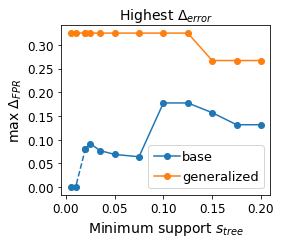

In [26]:
show_sup_dotted = [0.005, 0.01, 0.02 ]
show_sup = [0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

n_attributes = 3
vs = {}
stats_tree = overall_stats[n_attributes]

fig, ax = plt.subplots(figsize = (4,3.5))

base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

base = dict(sorted(base.items(), key=lambda item: item[0]))
gen = dict(sorted(gen.items(), key=lambda item: item[0]))
base_dotted = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup_dotted}
gen_dotted =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup_dotted}

base_dotted = dict(sorted(base_dotted.items(), key=lambda item: item[0]))
gen_dotted = dict(sorted(gen_dotted.items(), key=lambda item: item[0]))
b, = ax.plot(list(base.keys()), list(base.values()), label = "base", marker = "o", c = "C0")
g, = ax.plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o", c = "C1")
ax.plot(list(base_dotted.keys()), list(base_dotted.values()), label = "base", marker = "o", c = "C0", linestyle="--")
ax.plot(list(gen_dotted.keys()), list(gen_dotted.values()), label = "generalized", marker = "o", c = "C1", linestyle="--")

ax.set_title(r"Highest Δ$_{error}$")
ax.set_ylabel(r"max Δ$_{FPR}$")
ax.set_xlabel(r"Minimum support $s_{tree}$")

ax.legend([b, g], ['base', 'generalized'], fontsize = 13,  handletextpad=0.2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): #ax.get_xticklabels()
    item.set_fontsize(14)

for item in ax.get_xticklabels() + ax.get_yticklabels():
     item.set_fontsize(12)


plt.tight_layout();
plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity_{n_attributes}_s_{min_sup_divergence}.pdf");

In [27]:
base_dotted

{0.005: 0.0, 0.01: 0.0, 0.02: 0.08058554216867464}

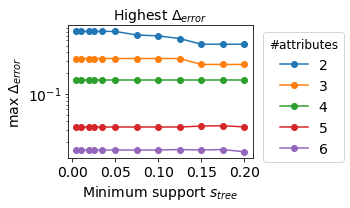

In [231]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
fig, ax = plt.subplots(figsize = (5,3))

res = {}
for n_attributes in overall_stats:
    if n_attributes>6:
        break
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    

    base = { float(min_support): stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { float(min_support): stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))

    ax.plot(list(gen.keys()), list(gen.values()), label = n_attributes, marker = "o")
    ax.set_yscale('log')
    ax.set_ylabel(r"max Δ$_{error}$")
    ax.set_xlabel(r"Minimum support $s_{tree}$")
    ax.set_title(r"Highest Δ$_{error}$")



    
    res[n_attributes] = gen
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    
ax.legend(bbox_to_anchor=(1.02,1), loc="upper left", fontsize = 14, title = "#attributes", title_fontsize=12)

r = pd.DataFrame(res).round(2)

plt.tight_layout();
plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity_generalized.pdf");

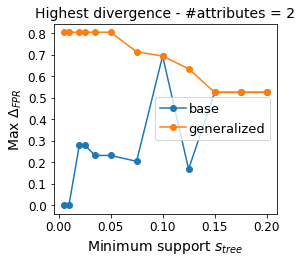

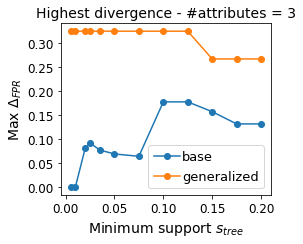

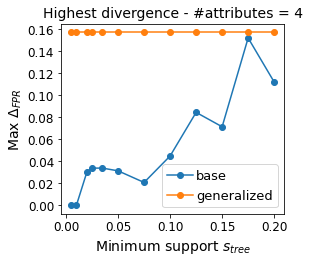

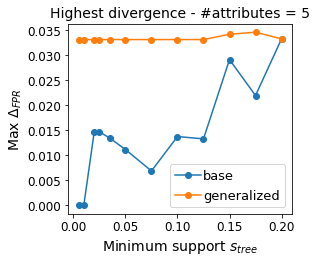

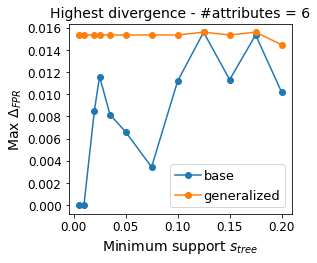

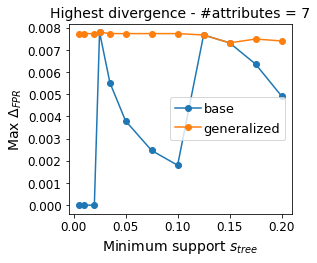

In [222]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]


for n_attributes in overall_stats:
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    fig, ax = plt.subplots(figsize = (4,3.5))

    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))


    ax.plot(list(base.keys()), list(base.values()), label = "base", marker = "o")
    ax.plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o")
    ax.set_title(f"Highest divergence - #attributes = {n_attributes}")
    ax.set_ylabel(r"Max Δ$_{FPR}$")
    ax.set_xlabel(r"Minimum support $s_{tree}$")
    plt.legend( fontsize = 13, handletextpad=0.2)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): #ax.get_xticklabels()
        item.set_fontsize(14)

    for item in ax.get_xticklabels() + ax.get_yticklabels():
         item.set_fontsize(12)
            
    if n_attributes in  [3]:
        plt.tight_layout();
        plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity_{n_attributes}_s_{min_sup_divergence}.pdf");

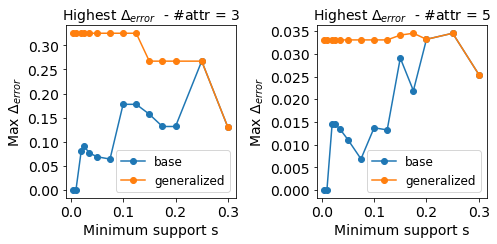

In [169]:
show_sup = min_sups#[0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

fig, ax = plt.subplots(1, 2, figsize = (7,3.5))


for e, n_attributes in enumerate([3, 5]):
    stats_tree = overall_stats[n_attributes]


    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))


    ax[e].plot(list(base.keys()), list(base.values()), label = "base", marker = "o")
    ax[e].plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o")
    ax[e].set_title(r"Highest Δ$_{error}$ " + f" - #attr = {n_attributes}")

    ax[e].legend(fontsize = 12)
    ax[e].set_ylabel(r"Max Δ$_{error}$")
    ax[e].set_xlabel("Minimum support s")
    
    for item in ([ax[e].title, ax[e].xaxis.label, ax[e].yaxis.label] +
                 ax[e].get_xticklabels() + ax[e].get_yticklabels()):
        item.set_fontsize(14)
plt.tight_layout();
plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity.pdf");

2


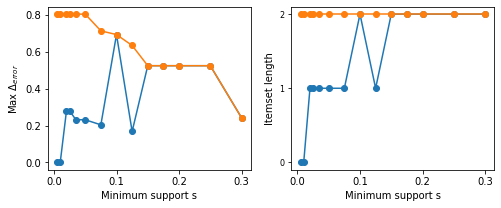

3


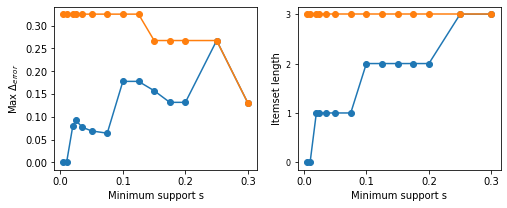

4


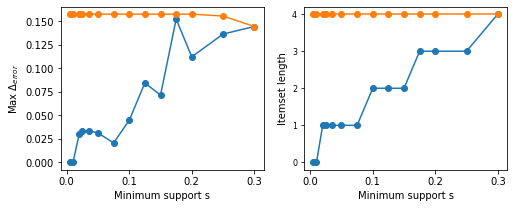

5


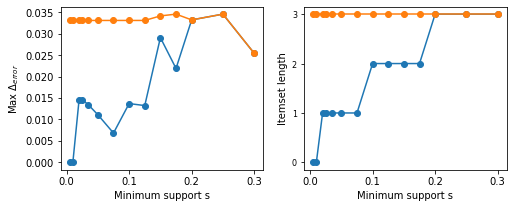

6


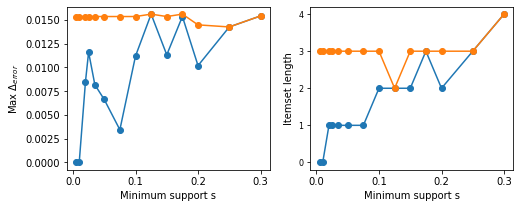

7


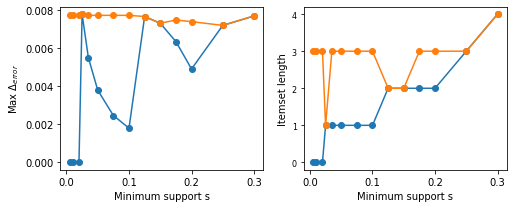

In [149]:
show_sup = min_sups#[0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]


for n_attributes in overall_stats:
    print(n_attributes)
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    fig, ax = plt.subplots(1, 2, figsize = (8,3))

    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))


    ax[0].plot(list(base.keys()), list(base.values()), label = "leaf items", marker = "o")
    ax[0].plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o")
    ax[0].set_ylabel(r"Max Δ$_{error}$")
    ax[0].set_xlabel("Minimum support s")
    
    base = { min_support: stats_tree[min_support]["base"]["length"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["length"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))

    
    ax[1].plot(list(base.keys()), list(base.values()), label = "leaf items", marker = "o")
    ax[1].plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o")
    ax[1].set_ylabel("Itemset length")
    ax[1].set_xlabel("Minimum support s")
    from matplotlib.ticker import FormatStrFormatter
    vals = set(gen.values()).union(set(base.values()))
    ax[1].set_yticks(range(min(vals), max(vals)+1), fontsize=8)
    ax[1].set_yticklabels(range(min(vals), max(vals)+1), fontsize=8)
    plt.show()

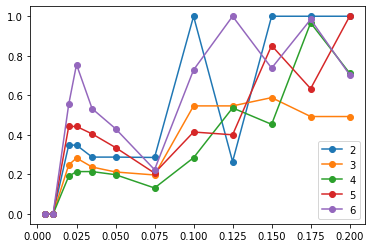

,0.005,0.010,0.020,0.025,0.035,0.050,0.075,0.100,0.125,0.150,0.175,0.200
2,0.0,0.0,0.35,0.35,0.29,0.29,0.29,1.00,0.26,1.00,1.00,1.00
3,0.0,0.0,0.25,0.28,0.24,0.21,0.20,0.55,0.55,0.59,0.49,0.49
4,0.0,0.0,0.19,0.21,0.21,0.20,0.13,0.28,0.54,0.45,0.97,0.71
5,0.0,0.0,0.44,0.44,0.40,0.34,0.21,0.41,0.40,0.85,0.63,1.00
6,0.0,0.0,0.55,0.76,0.53,0.43,0.22,0.73,1.00,0.74,0.98,0.70


In [96]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
fig, ax = plt.subplots()

res = {}
for n_attributes in overall_stats:
    
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    

    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))

    ratio = {k: base[k]/gen[k] for k in base}
    ax.plot(list(base.keys()), list(ratio.values()), label = n_attributes, marker = "o")
    res[n_attributes] = ratio
plt.legend()
plt.show()
pd.DataFrame(res).T.round(2)

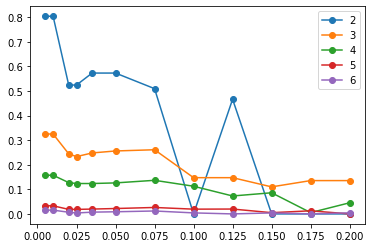

,0.005,0.010,0.020,0.025,0.035,0.050,0.075,0.100,0.125,0.150,0.175,0.200
2,0.80,0.80,0.52,0.52,0.57,0.57,0.51,0.00,0.47,0.00,0.00,0.00
3,0.33,0.33,0.24,0.23,0.25,0.26,0.26,0.15,0.15,0.11,0.14,0.14
4,0.16,0.16,0.13,0.12,0.12,0.13,0.14,0.11,0.07,0.09,0.01,0.05
5,0.03,0.03,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.01,0.01,0.00
6,0.02,0.02,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00


In [127]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
fig, ax = plt.subplots()

res = {}
for n_attributes in overall_stats:
    
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    

    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))

    ratio = {k: gen[k]-base[k] for k in base}
    ax.plot(list(base.keys()), list(ratio.values()), label = n_attributes, marker = "o")
    res[n_attributes] = ratio
plt.legend()
plt.show()
pd.DataFrame(res).T.round(2)

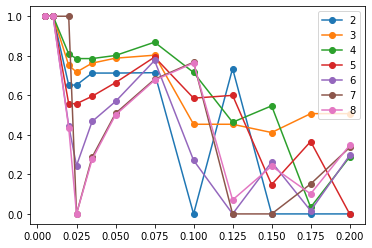

,0.005,0.010,0.020,0.025,0.035,0.050,0.075,0.100,0.125,0.150,0.175,0.200
2,1.0,1.0,0.65,0.65,0.71,0.71,0.71,0.00,0.74,0.00,0.00,0.00
3,1.0,1.0,0.75,0.72,0.76,0.79,0.80,0.45,0.45,0.41,0.51,0.51
4,1.0,1.0,0.81,0.79,0.79,0.80,0.87,0.72,0.46,0.55,0.03,0.29
5,1.0,1.0,0.56,0.56,0.60,0.66,0.79,0.59,0.60,0.15,0.37,0.00
6,1.0,1.0,0.45,0.24,0.47,0.57,0.78,0.27,0.00,0.26,0.02,0.30
7,1.0,1.0,1.00,0.00,0.29,0.51,0.68,0.77,0.00,0.00,0.15,0.34
8,1.0,1.0,0.44,0.00,0.28,0.50,0.68,0.76,0.07,0.24,0.10,0.35


In [86]:
show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
fig, ax = plt.subplots()

res = {}
for n_attributes in overall_stats:
    
    vs = {}
    stats_tree = overall_stats[n_attributes]
    
    

    base = { min_support: stats_tree[min_support]["base"]["d_error"] for min_support in stats_tree if min_support in show_sup}
    gen =  { min_support: stats_tree[min_support]["generalized"]["d_error"] for min_support in stats_tree if min_support in show_sup}

    base = dict(sorted(base.items(), key=lambda item: item[0]))
    gen = dict(sorted(gen.items(), key=lambda item: item[0]))

    ratio = {k: (gen[k]-base[k])/gen[k] for k in base}
    ax.plot(list(base.keys()), list(ratio.values()), label = n_attributes, marker = "o")
    res[n_attributes] = ratio
plt.legend()
plt.show()
pd.DataFrame(res).T.round(2)

In [173]:
r.describe()

,2,3,4,5,6,7
count,12.000000,12.000000,1.200000e+01,1.200000e+01,12.000000,1.200000e+01
mean,0.699167,0.315000,1.600000e-01,3.000000e-02,0.019167,1.000000e-02
std,0.121465,0.027136,2.898975e-17,1.087116e-17,0.002887,1.811860e-18
min,0.520000,0.270000,1.600000e-01,3.000000e-02,0.010000,1.000000e-02
25%,0.602500,0.315000,1.600000e-01,3.000000e-02,0.020000,1.000000e-02
50%,0.755000,0.330000,1.600000e-01,3.000000e-02,0.020000,1.000000e-02
75%,0.800000,0.330000,1.600000e-01,3.000000e-02,0.020000,1.000000e-02
max,0.800000,0.330000,1.600000e-01,3.000000e-02,0.020000,1.000000e-02


In [139]:

def color_greater_1(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    return 'background-color: #EAF2F8' if val>0 else 'background-color: white'

In [141]:
r.style.format(precision=2).applymap(color_greater_1)

,0.005000,0.010000,0.020000,0.025000,0.035000,0.050000,0.075000,0.100000,0.125000,0.150000,0.175000,0.200000
2,1.00,1.00,0.65,0.65,0.71,0.71,0.71,0.00,0.74,0.00,0.00,0.00
3,1.00,1.00,0.75,0.72,0.76,0.79,0.80,0.45,0.45,0.41,0.51,0.51
4,1.00,1.00,0.81,0.79,0.79,0.80,0.87,0.72,0.46,0.55,0.03,0.29
5,1.00,1.00,0.56,0.56,0.60,0.66,0.79,0.59,0.60,0.15,0.37,0.00
6,1.00,1.00,0.45,0.24,0.47,0.57,0.78,0.27,0.00,0.26,0.02,0.30
